<h1 style align="center"> Exploratory Data Analysis </h1>
<hr>
<h5 style align="right"> Work Done by : Marah Baccari & Wissem Bellara  </h3>

<h2> I. Business Understanding</h2>

<p>We have a network intrusion detection dataset, commonly used for classifying network connections as either 'Normal' or 'Anomalous' (indicating a potential attack). Each row in this dataset corresponds to a network connection, and the 'class' column is the target variabl that we're trying to predict. </p>

In [55]:
%matplotlib inline
import pandas as pd
import seaborn as sns 
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import pingouin

In [7]:
train = pd.read_csv('Train_data.csv')

<h2>II. Data Understanding </h2>

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [9]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [10]:
train.shape

(25192, 42)

In [11]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [12]:
train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

<b>Let's understand our columns:</b> </b>
<ol>
<li><b> duration:</b> The length (in seconds) of the connection. It measures the time duration for which the connection was active.</li><br>

<li><b> protocol_type:</b> The type of network protocol used for the connection (e.g., TCP, UDP, ICMP).</li><br>

<li><b> service:</b> The network service on the destination host (e.g., http, ftp, telnet).</li><br>

<li><b> flag:</b> A flag indicating the status of the connection (e.g., SF for "normal," S0 for "connection attempt," REJ for "connection rejected").</li><br>

<li><b> src_bytes:</b> The number of data bytes from the source to the destination during the connection.</li><br>

<li><b> dst_bytes:</b> The number of data bytes from the destination to the source during the connection.</li><br>

<li><b> land:</b> Indicates if the connection is from/to the same host/land. It's a binary variable.</li><br>

<li><b> wrong_fragment:</b> The number of "wrong" fragments in the connection.</li><br>

<li><b> urgent:</b> The number of urgent packets in the connection.</li><br>

<li><b> hot:</b> The number of "hot" indicators in the connection.</li><br>

<li><b> num_failed_logins:</b> The number of failed login attempts.</li><br>

<li><b> logged_in:</b> Indicates if the user is logged in (binary, 1 for yes, 0 for no).</li><br>

<li><b> num_compromised:</b> The number of compromised conditions.</li><br>

<li><b> root_shell:</b> Indicates if the root shell is obtained (binary).</li><br>

<li><b> su_attempted:</b> Indicates if an "su root" command was attempted (binary).</li><br>

<li><b> num_root:</b> The number of root accesses.</li><br>

<li><b> num_file_creations:</b> The number of file creations.</li><br>

<li><b> num_shells:</b> The number of shell prompts.</li><br>

<li><b> num_access_files:</b> The number of operations on access control files.</li><br>

<li><b> num_outbound_cmds:</b> The number of outbound commands in an ftp session.</li><br>

<li><b> is_host_login:</b> Indicates if the login belongs to the "host" login type.</li><br>

<li><b> is_guest_login:</b> Indicates if the login is a "guest" login.</li><br>

<li><b> count:</b> The number of connections to the same host as the current connection in the past two seconds.</li><br>

<li><b> srv_count:</b> The number of connections to the same service as the current connection in the past two seconds.</li><br>

<li><b> serror_rate:</b> The percentage of connections that have "SYN" errors.</li><br>

<li><b> srv_serror_rate:</b> The percentage of connections to the same service with "SYN" errors.</li><br>

<li><b> rerror_rate:</b> The percentage of connections that have "REJ" errors.</li><br>

<li><b> srv_rerror_rate:</b> The percentage of connections to the same service with "REJ" errors.</li><br>

<li><b> same_srv_rate:</b> The percentage of connections to the same service.</li><br>

<li><b> diff_srv_rate:</b> The percentage of connections to different services.</li><br>

<li><b> srv_diff_host_rate:</b> The percentage of connections to different hosts among the same service.</li><br>

<li><b> dst_host_count:</b> The number of connections to the same destination host.</li><br>

<li><b> dst_host_srv_count:</b> The number of connections to the same service on the destination host.</li><br>

<li><b> dst_host_same_srv_rate:</b> The percentage of connections to the same service on the destination host.</li><br>

<li><b> dst_host_diff_srv_rate:</b> The percentage of connections to different services on the destination host.</li><br>

<li><b> dst_host_same_src_port_rate:</b> The percentage of connections with the same source port to the same destination host.</li><br>

<li><b> dst_host_srv_diff_host_rate:</b> The percentage of connections with different hosts to the same service on the destination host.</li><br>

<li><b> dst_host_serror_rate:</b> The percentage of connections that have "SYN" errors to the destination host.</li><br>

<li><b> dst_host_srv_serror_rate:</b> The percentage of connections to the same service with "SYN" errors on the destination host.</li><br>

<li><b> dst_host_rerror_rate:</b> The percentage of connections that have "REJ" errors to the destination host.</li><br>

<li><b> dst_host_srv_rerror_rate:</b> The percentage of connections to the same service with "REJ" errors on the destination host.</li><br>

<li><b> class:</b> This is the target variable that indicates whether the connection is 'Normal' or 'Anomalous' (i.e., an attack).</li><br>

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [14]:
train.duplicated().sum()

0

In [15]:
train['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

In [16]:
#Summary Statistics
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.0,25192.0,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,0.001548,0.001350,0.249841,0.014727,0.000357,0.004327,0.0,0.0,0.009130,84.591180,27.698754,0.286338,0.283762,0.118630,0.120260,0.660559,0.062363,0.095931,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,0.039316,0.048785,11.500842,0.529602,0.018898,0.098524,0.0,0.0,0.095115,114.673451,72.468242,0.447312,0.447599,0.318745,0.322335,0.439637,0.178550,0.256583,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,144.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,1.000000,2.000000,975.000000,40.000000,1.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The dataset exhibits a shape of (25192, 42), indicating 25,192 rows and 42 columns. A glance at train.info() shows that all columns have non-null values, eliminating the need for imputation. Data types are appropriately assigned, including integers, floats, and objects. No duplicated rows are present in the dataset (train.duplicated().sum(): 0). The target variable, 'class,' demonstrates a balanced distribution, with 'normal' occurring 13,449 times and 'anomaly' occurring 11,743 times (train['class'].value_counts(): normal 13449, anomaly 11743). This balance is crucial for training a machine learning model, preventing bias towards the majority class. In summary, the dataset appears well-prepared for further exploration, preprocessing, and model training for network intrusion detection.

In [17]:
''' Encoding categorical data, for further exploring (Visulaization)'''
train_transformed = train.copy()
lb=LabelEncoder()
train_transformed['protocol_type']=lb.fit_transform(train_transformed['protocol_type'])
train_transformed['service']=lb.fit_transform(train_transformed['service'])
train_transformed['flag']=lb.fit_transform(train_transformed['flag'])
train_transformed['class']=lb.fit_transform(train_transformed['class'])

In [18]:
''' Normalizing some numerical columns that have large gaps '''
# Select the column to be standardized
column_to_scale = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count']

# Initialize the StandardScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to the selected column
train_transformed[column_to_scale] = scaler.fit_transform(train_transformed[column_to_scale])

In [19]:
# Revise the dataset after the modifications
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [20]:
''' Create a function to check for columns that have only value '''
def CalcVals(df, value) :
    """returns a list of columns containing only 'value' """
    cols=[]
    for i in df.columns:
        if train[i].sum() == value:
            cols.append(i)
    return cols

In [21]:
def minmax (df) :
    minmax={}
    for i in df.columns :
        minmax[i]=( ( df[i].min() , df[i].max() ) )
    return minmax

In [22]:
minmax(train)

{'duration': (0, 42862),
 'protocol_type': ('icmp', 'udp'),
 'service': ('IRC', 'whois'),
 'flag': ('OTH', 'SH'),
 'src_bytes': (0, 381709090),
 'dst_bytes': (0, 5151385),
 'land': (0, 1),
 'wrong_fragment': (0, 3),
 'urgent': (0, 1),
 'hot': (0, 77),
 'num_failed_logins': (0, 4),
 'logged_in': (0, 1),
 'num_compromised': (0, 884),
 'root_shell': (0, 1),
 'su_attempted': (0, 2),
 'num_root': (0, 975),
 'num_file_creations': (0, 40),
 'num_shells': (0, 1),
 'num_access_files': (0, 8),
 'num_outbound_cmds': (0, 0),
 'is_host_login': (0, 0),
 'is_guest_login': (0, 1),
 'count': (1, 511),
 'srv_count': (1, 511),
 'serror_rate': (0.0, 1.0),
 'srv_serror_rate': (0.0, 1.0),
 'rerror_rate': (0.0, 1.0),
 'srv_rerror_rate': (0.0, 1.0),
 'same_srv_rate': (0.0, 1.0),
 'diff_srv_rate': (0.0, 1.0),
 'srv_diff_host_rate': (0.0, 1.0),
 'dst_host_count': (0, 255),
 'dst_host_srv_count': (0, 255),
 'dst_host_same_srv_rate': (0.0, 1.0),
 'dst_host_diff_srv_rate': (0.0, 1.0),
 'dst_host_same_src_port_rate

In [23]:
CalcVals(train , 0)

['num_outbound_cmds', 'is_host_login']

In [24]:
train = train.drop(CalcVals(train , 0), axis=1) #Removing Columns containing only 0

<h2> III. Data Visualization</h2>

In [25]:
# Personnalized colors
purp = ["#9659f4", "#5ccffb" , "#4335af" , "#c1c1c1"  , "#a0fdf1"]
sns.set_style({'axes.grid' : False})
sns.set_palette(purp)

In [26]:
train.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
7,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
8,0,tcp,remote_job,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.0,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
9,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.0,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


<h3> 1. Univariate Visualization</h3> <hr>
Univariate visualization involves exploring and understanding the distribution of individual variables in your dataset. It helps you grasp the characteristics of each feature without considering the relationship with other variables. Common univariate visualization techniques include histograms, box plots, and kernel density plots for numerical data, and bar charts or count plots for categorical data. Let's go through some examples:

<h4> a. Numerical Features</h4>

- <strong>Histograms : </strong> <br><hr>
For numerical features like duration, src_bytes, dst_bytes, etc., we can create histograms to visualize the distribution of values. This helps us understand the range, central tendency, and spread of each numerical variable.

<Axes: xlabel='same_srv_rate', ylabel='Count'>

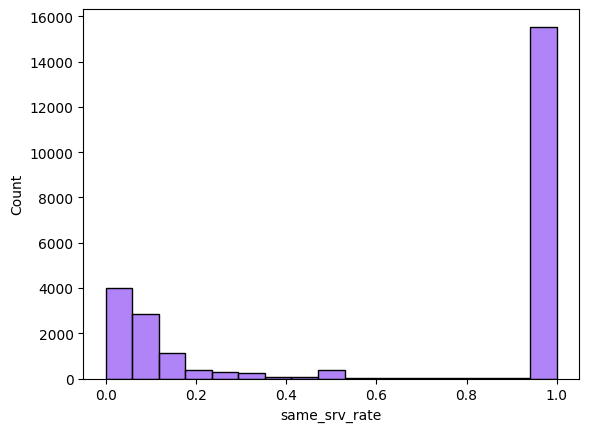

In [27]:
# same_srv_rate: The percentage of connections to the same service
sns.histplot(data=train, x='same_srv_rate')

- <strong>Box Plots</strong> <br><hr>
We usually use box plots to identify the presence of outliers in numerical features. Outliers may provide insights into potential anomalies or errors in the data.

<Axes: >

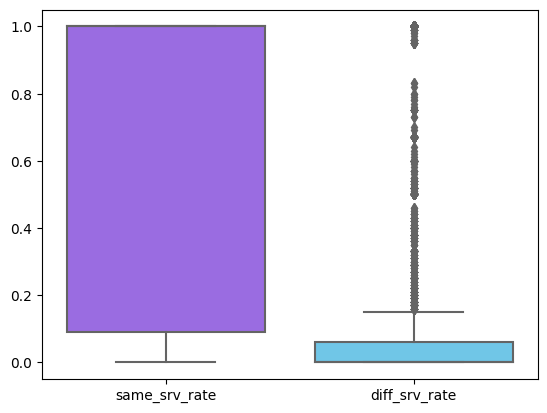

In [28]:
# diff_srv_rate: The percentage of connections to different services
# same_srv_rate: The percentage of connections to the same service
sns.boxplot(train_transformed[train_transformed.columns[28:30]])

<Axes: >

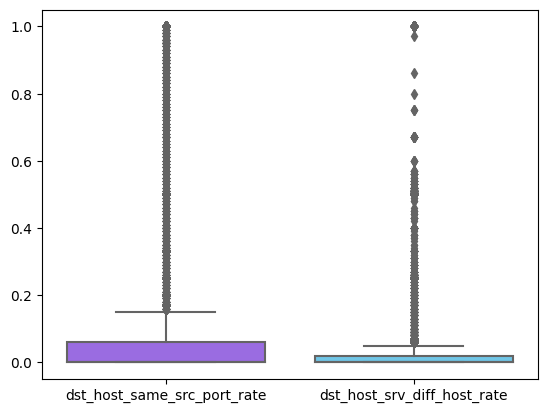

In [29]:
# The percentage of connections with the same source port to the same destination host
# dst_host_srv_diff_host_rate: The percentage of connections with different hosts to the same service on the destination host.
sns.boxplot(train[train.select_dtypes(['float' , 'int']).columns[30:32]])

- <strong>Kernel Density Plots</strong> <br><hr>
Kernel density plots can provide a smooth estimate of the probability density function for numerical features, giving us  a more nuanced view of the distribution.

<Axes: xlabel='count', ylabel='Density'>

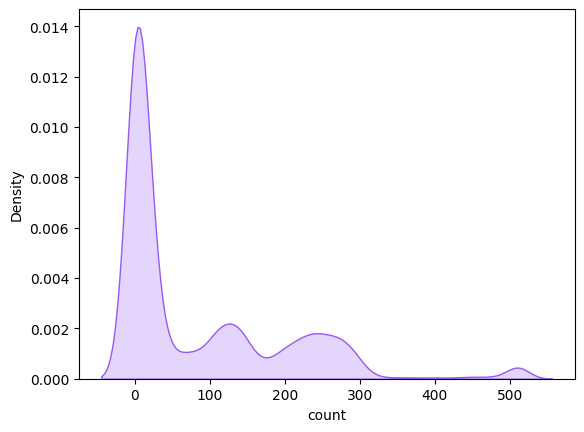

In [30]:
#count : The number of connections to the same host as the current connection in the past two seconds.
sns.kdeplot(data=train,x='count', fill=True) 

<Axes: xlabel='diff_srv_rate', ylabel='Density'>

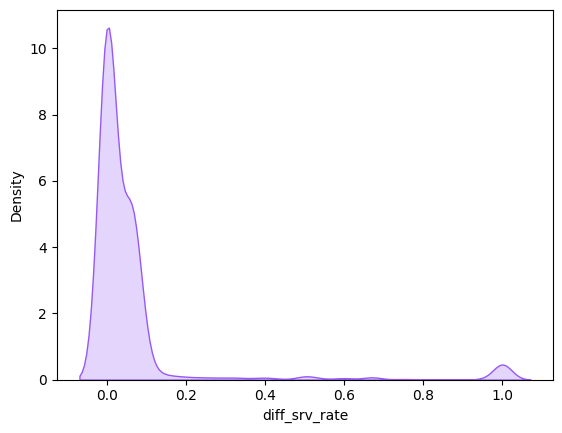

In [31]:
# diff_srv_rate: The percentage of connections to different services.
sns.kdeplot(data=train, x='diff_srv_rate', fill=True)

<h4>b. Categorical Features</h4>

- <strong>Bar Charts or Count Plots</strong> <br><hr>
For categorical features like protocol_type, service, flag, etc., we create bar charts or count plots to visualize the frequency of each category. This helps us understand the distribution of categorical variables.

<Axes: xlabel='class', ylabel='count'>

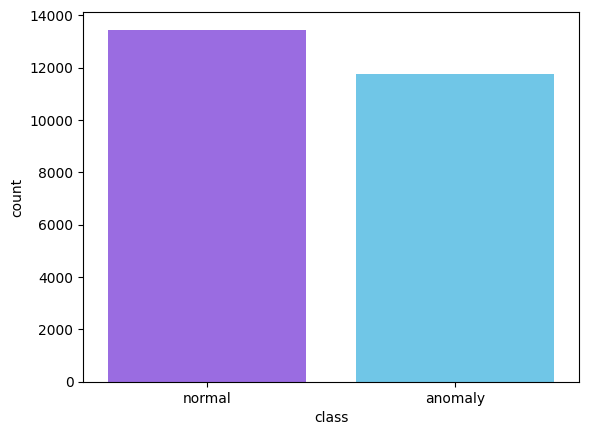

In [32]:
'''Class Distribution:
Create a bar chart or count plot for the target variable class to visualize the distribution of 'Normal' and 'Anomalous' instances. This is crucial for understanding the balance in our dataset.'''
sns.countplot(data=train , x='class')

<Axes: xlabel='protocol_type', ylabel='count'>

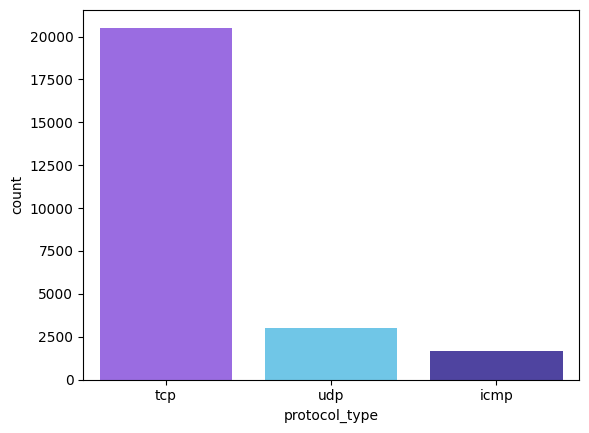

In [33]:
sns.countplot(data=train , x='protocol_type')

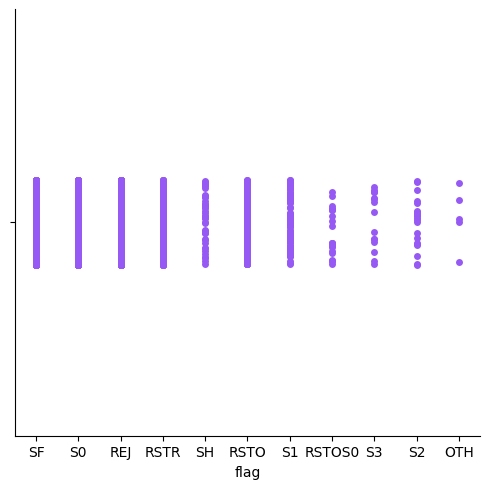

In [34]:
sns.catplot(data=train, x='flag')

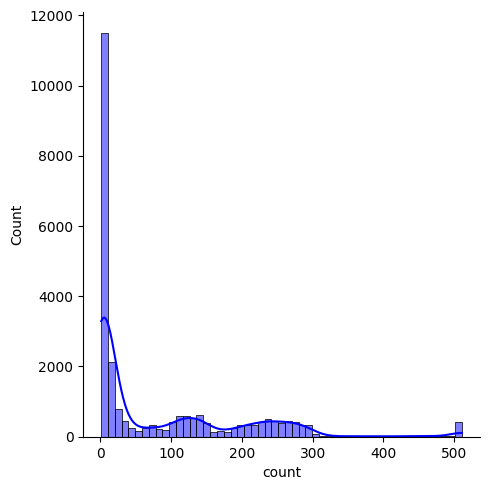

In [35]:
sns.displot(train['count'], kde=True, color='b')

<h3>2. Bivariate Visualization</h3>

- <strong>Scatter Plots</strong> <br><hr>
To visualize the relationship between two numerical variables.

<Axes: xlabel='num_root', ylabel='num_compromised'>

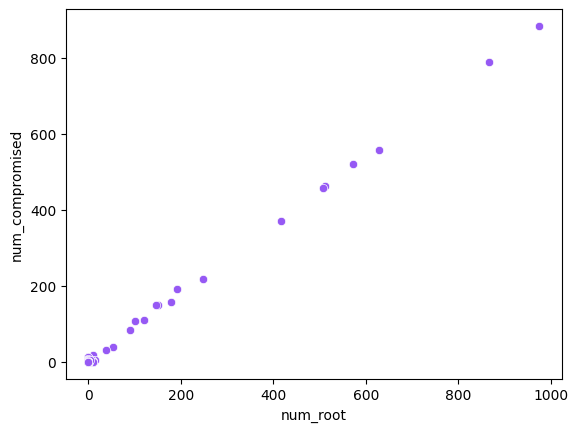

In [36]:
# num_compromised: The number of compromised conditions.
# num_root: The number of root accesses.
sns.scatterplot(data=train, x='num_root' , y='num_compromised')

- <strong>Regplot</strong> <br><hr>
It's a scatter plot with a linear regression line fitted to the data. It can be used to visualize the relationship between two numerical variables and assess the strength and direction of the linear relationship.

<Axes: xlabel='num_root', ylabel='num_compromised'>

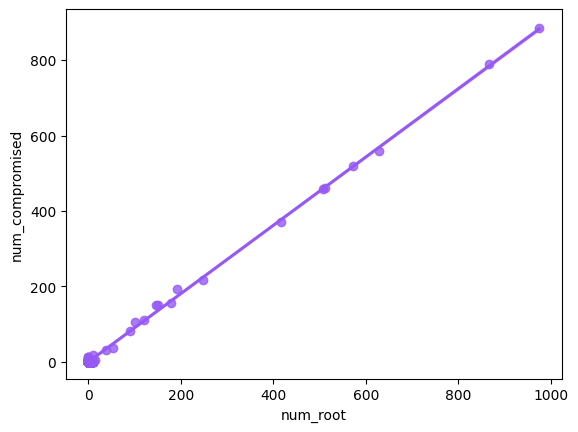

In [37]:
# num_compromised: The number of compromised conditions.
# num_root: The number of root accesses.
sns.regplot(data=train , x='num_root' , y='num_compromised')

<Axes: xlabel='srv_serror_rate', ylabel='srv_diff_host_rate'>

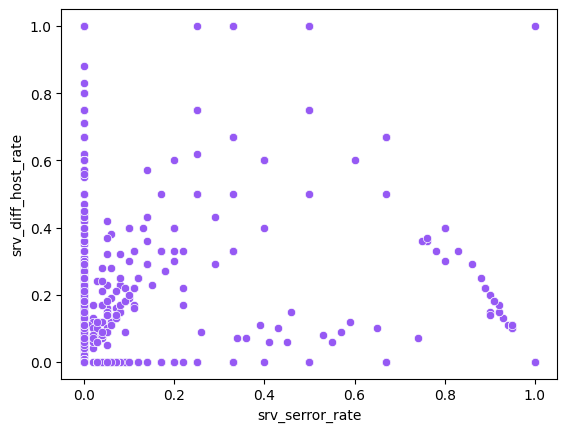

In [38]:
# srv_serror_rate: The percentage of connections to the same service with "SYN" errors.
# srv_diff_host_rate: The percentage of connections to different hosts among the same service.
sns.scatterplot(data=train, x='srv_serror_rate' , y='srv_diff_host_rate')

- <strong>Box Plots</strong> <br><hr>
To compare the distribution of a numerical variable across another category.

<Axes: xlabel='protocol_type', ylabel='count'>

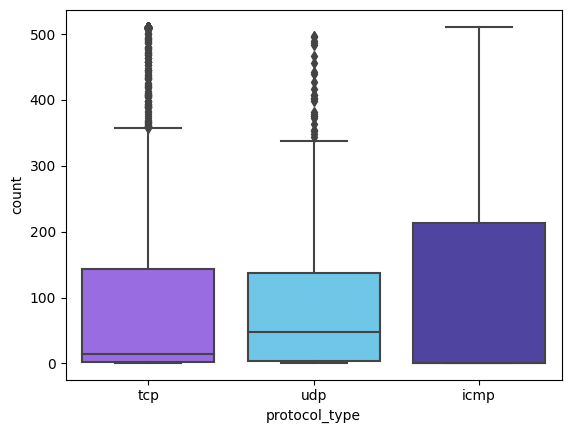

In [39]:
# protocol_type: The type of network protocol used for the connection (e.g., TCP, UDP, ICMP).
# count: The number of connections to the same host as the current connection in the past two seconds.
sns.boxplot(data=train, x='protocol_type' , y='count')

<Axes: xlabel='flag', ylabel='count'>

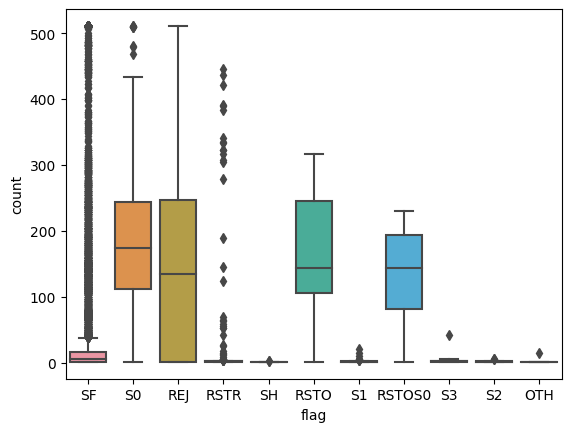

In [40]:
# flag: A flag indicating the status of the connection (e.g., SF for "normal," S0 for "connection attempt," REJ for "connection rejected").
# count: The number of connections to the same host as the current connection in the past two seconds.
sns.boxplot(data=train, x='flag' , y='count')

- <strong>Violin Plots</strong> <br><hr>
Similar to box plots but provides a kernel density estimate of the underlying distribution.

<Axes: xlabel='flag', ylabel='logged_in'>

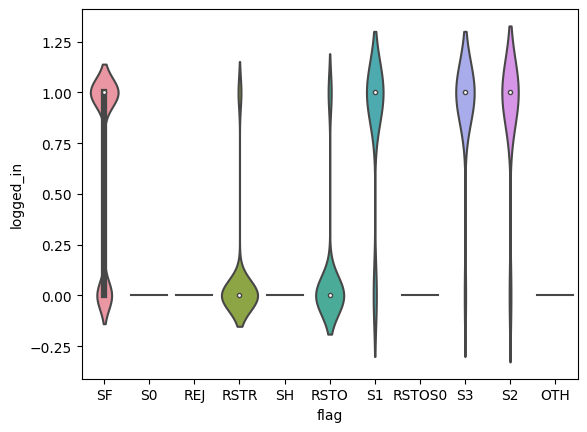

In [41]:
# flag: A flag indicating the status of the connection (e.g., SF for "normal," S0 for "connection attempt," REJ for "connection rejected").
# logged_in: Indicates if the user is logged in (binary, 1 for yes, 0 for no).
sns.violinplot(data=train, x='flag' , y='logged_in')

- <strong>Categorical Plots</strong> <br><hr>
To visualize the relationship between a numerical and a categorical variable.

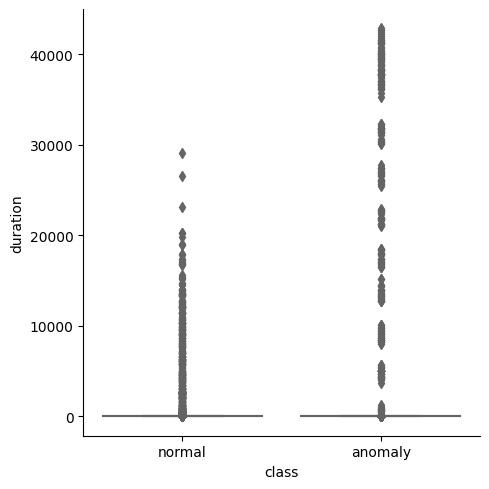

In [42]:
sns.catplot(x='class', y='duration', kind='box', data=train)

<h3>3. Multivariate Visualization</h3>
Multivariate visualization involves the simultaneous visualization of relationships between three or more variables. These visualizations are crucial for gaining insights into complex interactions and dependencies among multiple features in a dataset. Here are some common multivariate visualizations:

- <strong>Pair Plots with Hue</strong> <br><hr>
Visualizing relationships between multiple numerical variables, with the additional dimension of color representing a categorical variable.

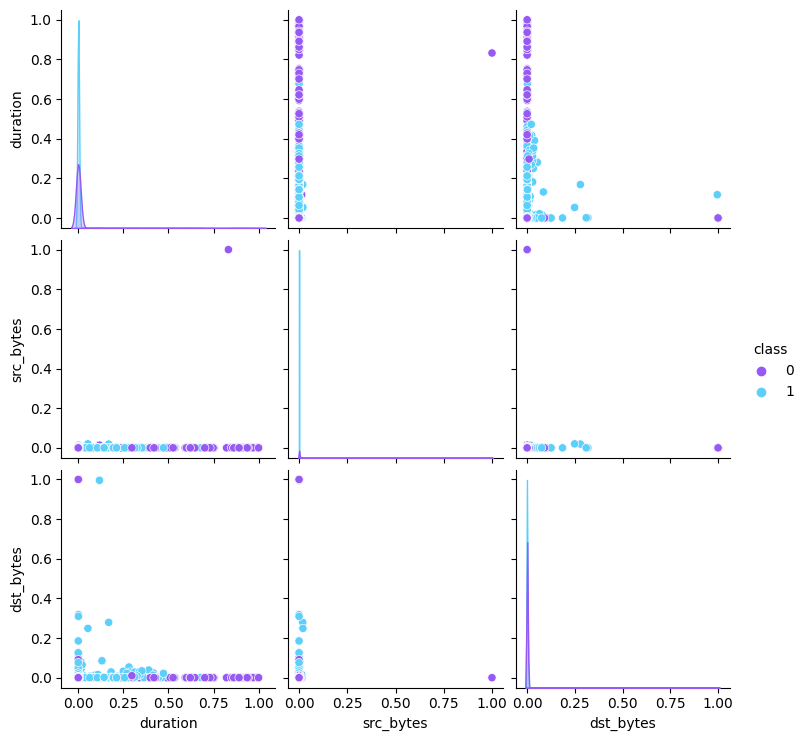

In [43]:
# duration:  The length (in seconds) of the connection. It measures the time duration for which the connection was active.
# src_bytes: The number of data bytes from the source to the destination during the connection.
# dst_bytes: The number of data bytes from the destination to the source during the connection.
sns.pairplot(train_transformed[['duration', 'src_bytes', 'dst_bytes', 'class']], hue='class')

- <strong>lmplot</strong> <br><hr>
Create scatter plots with regression lines, and it also provides the ability to include a third variable for color or markers. It is particularly useful for visualizing relationships between variables across different categories.

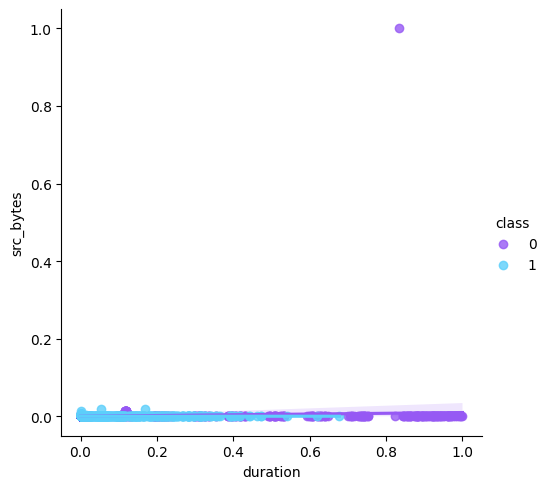

In [44]:
sns.lmplot(data=train_transformed, x='duration', y='src_bytes', hue='class')

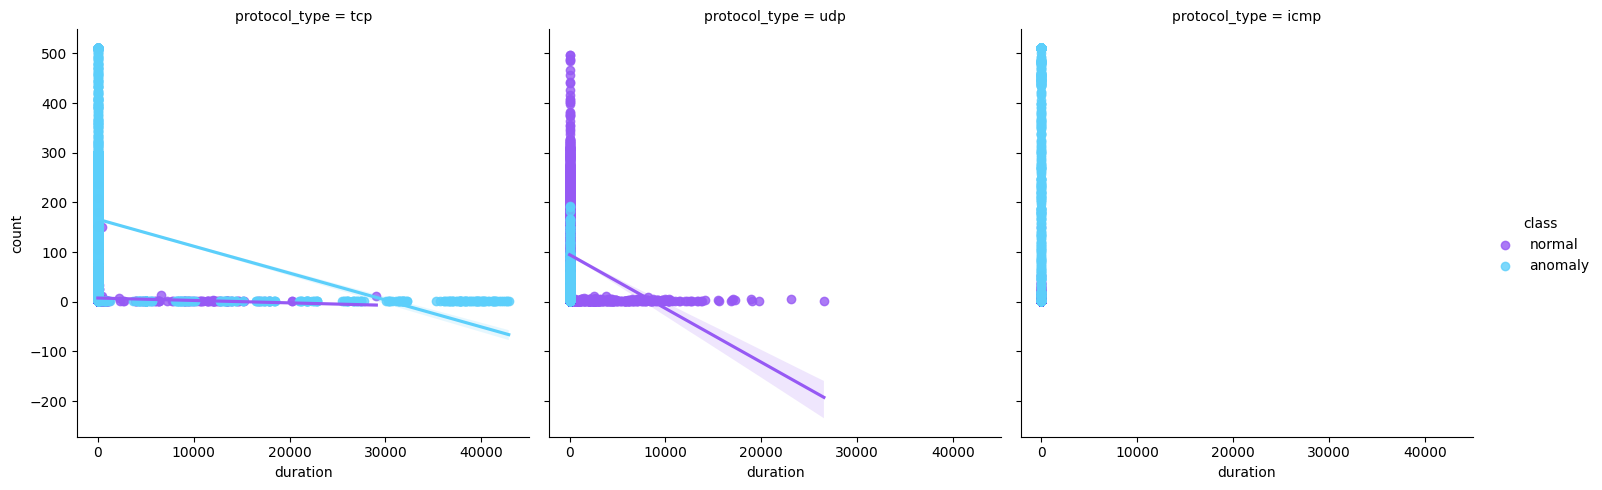

In [64]:
# count: The number of connections to the same host as the current connection in the past two seconds.
sns.lmplot(data=train, x='duration', y='count', hue='class', col = 'protocol_type')

- <strong>Heatmaps</strong> <br><hr>
To visualize the correlation between multiple numerical variables.

<Axes: >

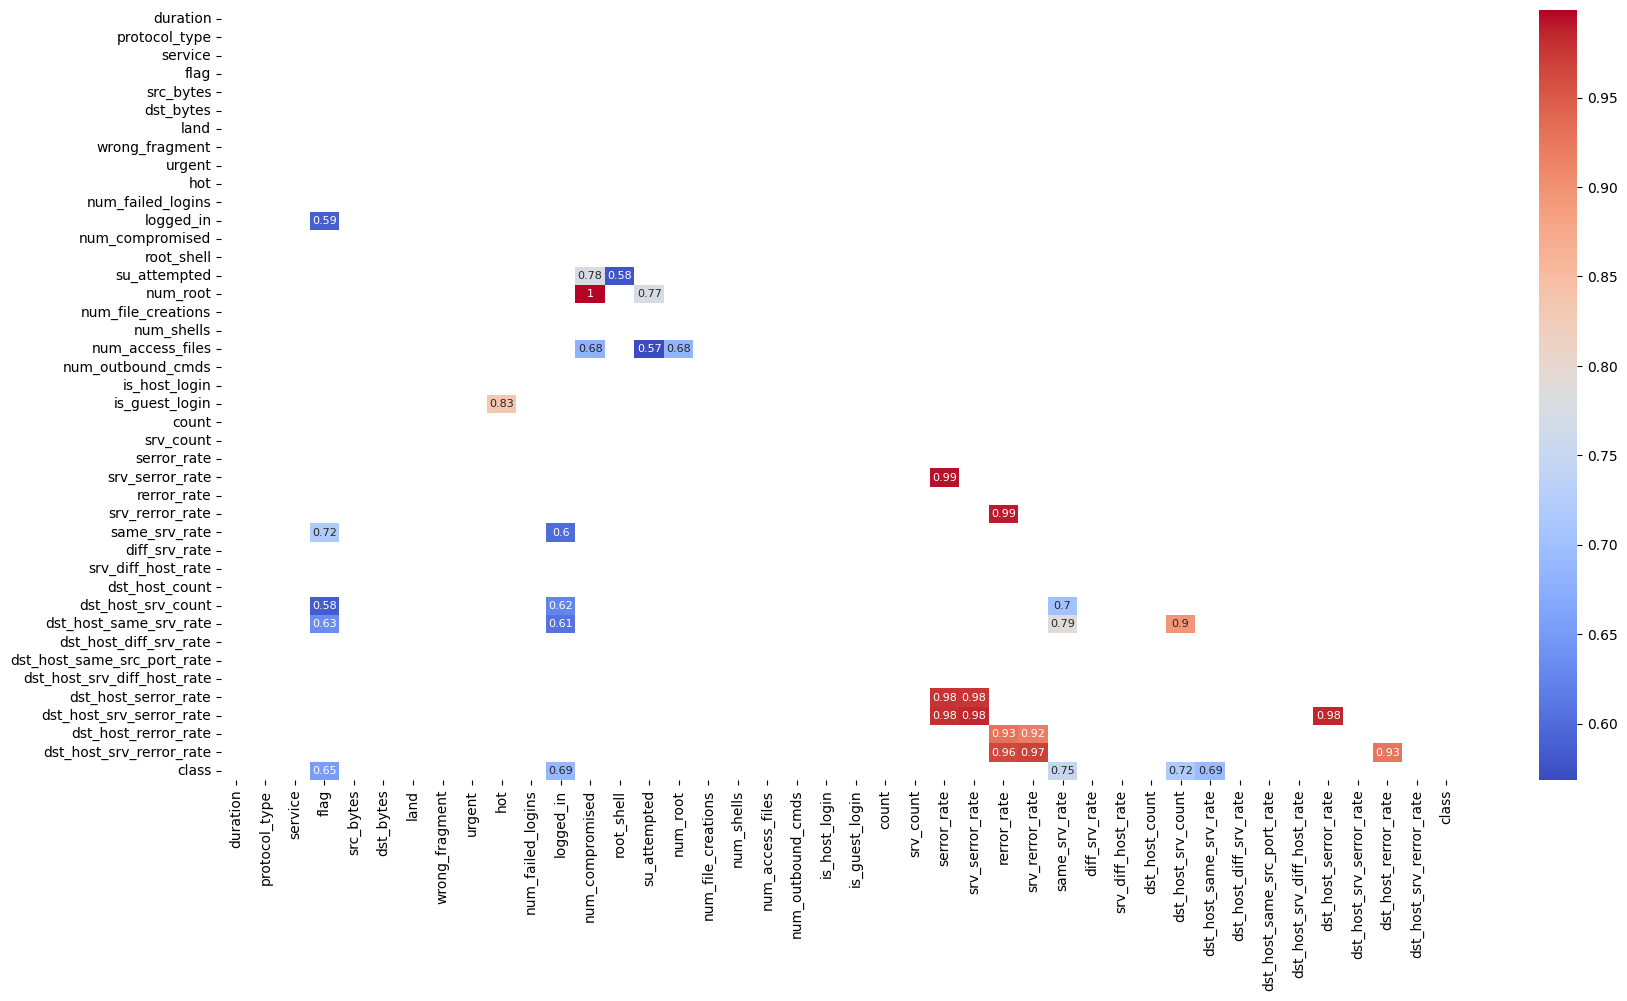

In [46]:
import numpy as np
corr_matrix = train_transformed.corr()

# Select columns with a correlation coefficient above a certain threshold
corr = corr_matrix[corr_matrix > 0.5]

# "mask" is used to show only the upper or the lower part of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool)) 

# Create a heatmap of the correlated columns
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(corr, annot=True, annot_kws={'size':8}, cmap='coolwarm', mask=mask)

<h2>IV. Hypothesis Testing</h2>
Hypothesis testing is a statistical method used to make inferences about a population based on a sample of data. It involves formulating a hypothesis, collecting data, and using statistical tests to determine whether there is enough evidence to reject the null hypothesis in favor of an alternative hypothesis. Here are the basic steps involved in hypothesis testing to answer some questions, we will try to make a hypothesis for every Hypothesis Test: T-Test, Chi-Square Test, ANOVA (Analysis of Variance), Regression Analysis..

![Tests](process.PNG)

<h3>1. Sampling</h3>

Sampling is critical because it allows researchers to make inferences about a larger population without having to study every individual in that population. The goal is to draw valid and reliable conclusions about the population based on a representative subset of data.



- <strong>Random Sampling</strong> <br><hr>

- Explanation: In random sampling, each individual in the population has an equal chance of being selected. This method is based on the principle of randomness, ensuring that every member of the population has an equal opportunity to be included in the sample.

- Use Case: Ideal for situations where the population is homogeneous, and every individual is equally likely to represent the entire population.

In [59]:
rand_sample = train.sample(frac=0.2)
rand_sample.shape

(5038, 40)

- <strong>Stratified Sampling</strong> <br><hr>

- Explanation: In stratified sampling, the population is divided into subgroups or strata based on certain characteristics. Random samples are then taken from each stratum. This ensures that each subgroup is represented in the final sample.

- Use Case: Useful when the population is heterogeneous, and there are distinct subgroups that need to be considered separately.

In [60]:
# Proportion of connections by protocol types
cnx_counts_pop = train['protocol_type'].value_counts(normalize=True)

# Print protocol_type_counts_pop
print(cnx_counts_pop) 

# Proportional stratified sampling for 40% of each protocol_type group
cnx_strat = train.groupby('protocol_type').sample(frac=0.4, random_state=2022)


# Print the sample
print(cnx_strat.shape)

tcp     0.814782
udp     0.119522
icmp    0.065695
Name: protocol_type, dtype: float64
(10076, 40)


In [61]:
# Proportion of connections by protocol types
cnx_eq = train.groupby('protocol_type')\
	.sample(n=1000, random_state=2022)      

# Get the proportions from cnx_eq
cnx_counts_eq = cnx_eq['protocol_type'].value_counts(normalize=True)

# Print the results
print(cnx_counts_eq)

icmp    0.333333
tcp     0.333333
udp     0.333333
Name: protocol_type, dtype: float64


- <strong>Cluster Sampling</strong> <br><hr>

- Explanation: Cluster sampling involves dividing the population into clusters, randomly selecting some clusters, and then sampling all individuals within those selected clusters.

- Use Case: Effective when the population is naturally grouped into clusters, and it is logistically easier to sample entire clusters.

In [62]:
import random
# Create a list of unique protocol_type values
protocol_type_pop = list(train['protocol_type'].unique())

# Randomly sample four protocol_type values
protocol_type_samp = random.sample(protocol_type_pop, k=3)

# Filter for rows where protocol_type is in protocol_type_samp
protocol_type_condition = train['protocol_type'].isin(protocol_type_samp)
cnx_filtered = train[protocol_type_condition]

# Randomly sample
cnx_clust = cnx_filtered.groupby('protocol_type').sample(n=1000, random_state=2022)


# Print the sample
print(cnx_clust.shape)

(3000, 40)


- <strong>Systematic Sampling</strong> <br><hr>

- Explanation: Systematic sampling involves selecting every kth element from a list after randomly selecting a starting point. The value of k is determined by dividing the population size by the desired sample size.

- Use Case: Suitable when the population is ordered in some way, and a systematic pattern can be applied to select samples.

In [63]:
# Set the sample size to 1000
sample_size = 1000

# Calculate the population size from train
pop_size = len(train)

# Calculate the interval 
interval = pop_size // sample_size

# Systematically sample 1000 rows
attrition_sys_samp = train[::interval]

# Print the sample
print(attrition_sys_samp.shape)

(1008, 40)


![Tests](imag.png)

<h3>2. Categorical Data </h3>

- <strong>Chi-Square Test</strong> <br><hr>
- Purpose: Used to test independence between two categorical variables or goodness of fit for one categorical variable against an expected distribution.

- <i>Hypotheses:</i>

  Null Hypothesis (H₀): there is no association between the "protocol_type" and "service" columns

  Alternative Hypothesis (H₁): there is an association of any kind between "protocol_type" and "service" columns
- <i>Specify the Significance Level (α):</i> α = 0.005

In [47]:
crosstab = pd.crosstab(train['protocol_type'], train['service'])
print(crosstab)

service        IRC  X11  Z39_50  auth  bgp  courier  csnet_ns  ctf  daytime  discard  domain  domain_u  echo  eco_i  ecr_i  efs  exec  finger  ftp  ftp_data  gopher  hostnames  http  http_443  http_8001  imap4  iso_tsap  klogin  kshell  ldap  link  login  mtp  name  netbios_dgm  netbios_ns  netbios_ssn  netstat  nnsp  nntp  ntp_u  other  pm_dump  pop_2  pop_3  printer  private  red_i  remote_job  rje  shell  smtp  sql_net  ssh  sunrpc  supdup  systat  telnet  tim_i  time  urh_i  urp_i  uucp  uucp_path  vmnet  whois
protocol_type                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [48]:
print(stats.chi2_contingency(crosstab)[:3])

(43084.681782297295, 0.0, 130)


In [49]:
print(list(stats.chi2_contingency(crosstab)[3:]))

[array([[2.62781836e+00, 1.44530010e+00, 1.12996189e+01, 1.24164417e+01,
        9.59153700e+00, 1.07740553e+01, 7.29219594e+00, 8.34332328e+00,
        7.02941410e+00, 6.89802318e+00, 7.16080502e+00, 1.19565735e+02,
        4.27020483e+00, 5.97171721e+01, 4.02713163e+01, 7.22650048e+00,
        5.97828676e+00, 2.40445379e+01, 2.26649333e+01, 9.17108606e+01,
        7.16080502e+00, 6.30676405e+00, 5.25760757e+02, 7.42358685e+00,
        6.56954589e-02, 9.06597332e+00, 8.60610511e+00, 6.04398222e+00,
        4.40159574e+00, 5.91259130e+00, 5.58411400e+00, 5.18994125e+00,
        5.91259130e+00, 6.04398222e+00, 5.58411400e+00, 4.99285487e+00,
        4.40159574e+00, 5.12424579e+00, 8.08054144e+00, 4.00742299e+00,
        2.10225468e+00, 5.63667037e+01, 1.97086377e-01, 1.11682280e+00,
        3.48185932e+00, 7.88345507e-01, 2.85840942e+02, 1.97086377e-01,
        1.11682280e+00, 1.31390918e+00, 7.22650048e-01, 9.51927199e+01,
        3.02199111e+00, 3.81033661e+00, 4.40159574e+00, 7.48928

The first value (43084.681782297295) is the Chi-square value, followed by the p-value (0.0), then comes the degrees of freedom (130), and lastly it outputs the expected frequencies as an array. 

Since all of the expected frequencies are less than 5, the chi2 test results can not be trusted. 

We can reject the null hypothesis as the p-value is less than 0.05. Thus, the results indicate that there is a relationship between Service and Protocol_type.

- <strong>Fisher's Exact Test</strong> <br><hr>
- Purpose: Similar to the chi-square test but used when sample sizes are small.
- <i>Hypotheses:</i>

  Null Hypothesis (H₀): The two variables are independent

  Alternative Hypothesis (H₁): The two variables are not independent
- <i>Specify the Significance Level (α):</i> α = 0.005

In [50]:
crosstab[:2][["urp_i","uucp"]]

service,urp_i,uucp
protocol_type,,
icmp,124,0
tcp,0,157


In [51]:
stats.fisher_exact(crosstab[:2][["urp_i","uucp"]], alternative='two-sided')

(inf, 3.7484310323745785e-83)

p-value : The probability under the null hypothesis of obtaining a table at least as extreme as the one that was actually observed. <br>
p-value = 3.74 * 10^-83 < α -> We reject H0

<h3>3. Numerical Data </h3>


- <strong>T-Test </strong> <br><hr>
- Purpose: Used to compare the means of two groups.

- <i>Hypotheses:</i>

  Null Hypothesis (H₀): There is no significant difference between the means of the two independent groups.

  Alternative Hypothesis (H₁): There is a significant difference between the means of the two independent groups.
- <i>Specify the Significance Level (α):</i> α = 0.005

In [52]:
stats.ttest_ind(train['duration'], train['num_failed_logins'], axis=0, equal_var=True, \
                nan_policy='propagate', permutations=None, \
                    random_state=None, alternative='two-sided', trim=0)

Ttest_indResult(statistic=18.022318547883692, pvalue=2.199310406044905e-72)

p-value = 2.19 *10^-72 < α -> We reject H0

- <strong>ANOVA (Analysis of Variance)</strong> <br><hr>
- Purpose: Used to compare means of more than two groups.
- Testing if there is a significant difference in the mean of column across multiple categories.
- <i>Hypotheses:</i>

  Null Hypothesis (H₀): There is no significant difference in the mean 'duration' across different 'protocol_type' groups.

  Alternative Hypothesis (H₁): There is a significant difference in the mean 'duration' across at least one 'protocol_type.'
- <i>Specify the Significance Level (α):</i> α = 0.005

In [56]:
import pingouin as pg

anova_result = pg.anova(data=train, dv='duration', between='protocol_type')

# Print the ANOVA summary
print(anova_result)

          Source  ddof1  ddof2          F         p-unc       np2
0  protocol_type      2  25189  17.598277  2.304093e-08  0.001395


Based on the small p-value, we would reject the null hypothesis and conclude that there is a statistically significant difference in the mean 'duration' across different 'protocol_type' groups.

- <strong>Kruskal-Wallis Test</strong> <br><hr>
- Purpose: Non-parametric alternative to ANOVA when assumptions are not met.
- <i>Hypotheses:</i>

  Null Hypothesis (H₀): There is no significant difference in the mean 'duration' across different 'protocol_type' groups.

  Alternative Hypothesis (H₁): There is a significant difference in the distribution of 'duration' across at least one 'protocol_type.'
  
- <i>Specify the Significance Level (α):</i> α = 0.005

In [57]:
kw_test = pingouin.kruskal(data=train, dv='duration', between='protocol_type')

# Print the Kruskal summary
print(kw_test)

                Source  ddof1           H         p-unc
Kruskal  protocol_type      2  297.976062  1.973878e-65


The p-value associated with the Kruskal-Wallis test is 1.973878e-65. So we would reject the null hypothesis. Therefore, we conclude that there are significant differences in the distribution of 'duration' across different 'protocol_type' groups.

- <strong>Mann-Whitney U Test</strong> <br><hr>
- Purpose: Non-parametric alternative to the t-test for comparing two independent groups.
- <i>Hypotheses:</i>

  Null Hypothesis (H₀): There is no significant difference in the mean 'duration' across different 'class' groups.

  Alternative Hypothesis (H₁): There is a significant difference in the distribution of 'duration' across at least one 'class.'
  
- <i>Specify the Significance Level (α):</i> α = 0.005

In [58]:
'''wilcsr = stats.wilcoxon(podataframe.votes2018,podataframe.votes2023)
print(wilcsr)'''

'wilcsr = stats.wilcoxon(podataframe.votes2018,podataframe.votes2023)\nprint(wilcsr)'